<a href="https://colab.research.google.com/github/manuhanono/test-pln-2024q1/blob/main/TP2_G8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [ ]:
pip install nltk pandas

In [ ]:
pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

# **Imports**


In [ ]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import altair as alt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
from gensim.models import Word2Vec


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Base**

In [ ]:
#Conexión E
df = '/content/drive/MyDrive/2024/NLP/TP-NLP/webmd.csv'

In [ ]:
df = pd.read_csv(df)

# **Exploración**

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

## **Valores Nulos**

In [ ]:
df.isnull().sum()

## **Valores Duplicados**

In [ ]:
df.drop_duplicates()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


## **Modificaciones**

### Eliminar Espacios

In [ ]:
for column in df:
    if df[column].dtype == 'object':
        df[column] = np.where(df[column] == " ", np.nan, df[column])

df.isna().sum()

Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews          41867
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [ ]:
df.dropna(subset=['Reviews'], inplace=True)

In [ ]:
df.dropna(subset=['Condition'], inplace=True)

### Transformar a fecha

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year

### Asignar con palabras claves al genero

In [ ]:
#Palabras clave genero femenino
palabras_clave = ['Period', 'Birth Control','Breastfeeding','Breast','Uterine','Uterus','Cervix','Vagin','Vulva','Pregnancy','Menopause','Yeast','Cervical','Ovar','menstrual']
palabras_clave1 = ['Period', 'Birth Control','Breastfeeding','Breast','Uterine','Uterus','Cervix','Vagin','Vulva','Pregnancy','Menopause','Yeast','Cervical','Ovar','my husband and I','nursing']
filtro_condiciones = df['Condition'].str.contains('|'.join(palabras_clave), case=False, na=False)  # 'case=False' para insensibilidad a mayúsculas
filtro_condiciones1 = df['Reviews'].str.contains('|'.join(palabras_clave1), case=False, na=False)  # 'case=False' para insensibilidad a mayúsculas
filtro_condiciones2 = df['Sides'].str.contains('|'.join(palabras_clave), case=False, na=False)  # 'case=False' para insensibilidad a mayúsculas

df.loc[(filtro_condiciones | filtro_condiciones1 | filtro_condiciones2),'Sex']= 'Female'

In [ ]:
#Palabras claves para genero masculino
palabras_clave_h = ['Prostate','Testis','Testicular','testicle']
palabras_clave1_h = ['Prostate','Testis','Testicular','my wife and I','penis','testicle','my son']
filtro_condiciones_h = df['Condition'].str.contains('|'.join(palabras_clave_h), case=False, na=False)  # 'case=False' para insensibilidad a mayúsculas
filtro_condiciones1_h = df['Reviews'].str.contains('|'.join(palabras_clave1_h), case=False, na=False)  # 'case=False' para insensibilidad a mayúsculas
filtro_condiciones2_h = df['Sides'].str.contains('|'.join(palabras_clave_h), case=False, na=False)  # 'case=False' para insensibilidad a mayúsculas

df.loc[(df['Sex'].isna()) & (filtro_condiciones_h | filtro_condiciones1_h| filtro_condiciones2_h),'Sex']= 'Male'

In [ ]:
#Los registros restantes se ponen como genero desconocido
df['Sex'].fillna('Unknown', inplace=True)

# **Graficos**

### Barchart de Unique Values

In [ ]:
uniques = pd.DataFrame({
    "columns": [col for col in df.columns if col != "Reviews"],
    "num of unique values": [df[col].nunique() for col in df.columns if col != "Reviews"]
})

bar_chart = alt.Chart(uniques).mark_bar(color='steelblue').encode(
    x=alt.X('num of unique values:Q', title='Number of Unique Values'),
    y=alt.Y('columns:N', title='Column Name', sort='-x'),
    tooltip=[alt.Tooltip('columns:N', title='Column'), alt.Tooltip('num of unique values:Q', title='Unique Values')]
).properties(
    title='Unique Values',
    width=600,
    height=300
)

text = bar_chart.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='num of unique values:Q'
)

final_chart = alt.layer(bar_chart, text)

final_chart

alt.LayerChart(...)

### Grafico de Genero

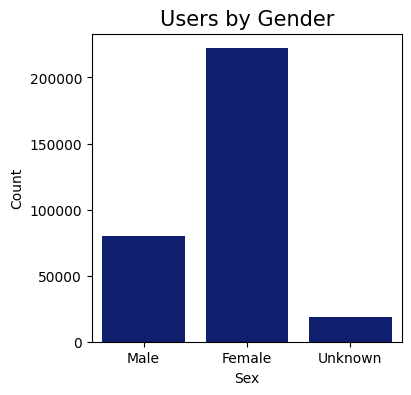

In [ ]:
plt.figure(figsize = (4,4))
s=sns.countplot(x='Sex', data=df, color='#00157c')
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Grafico por edad

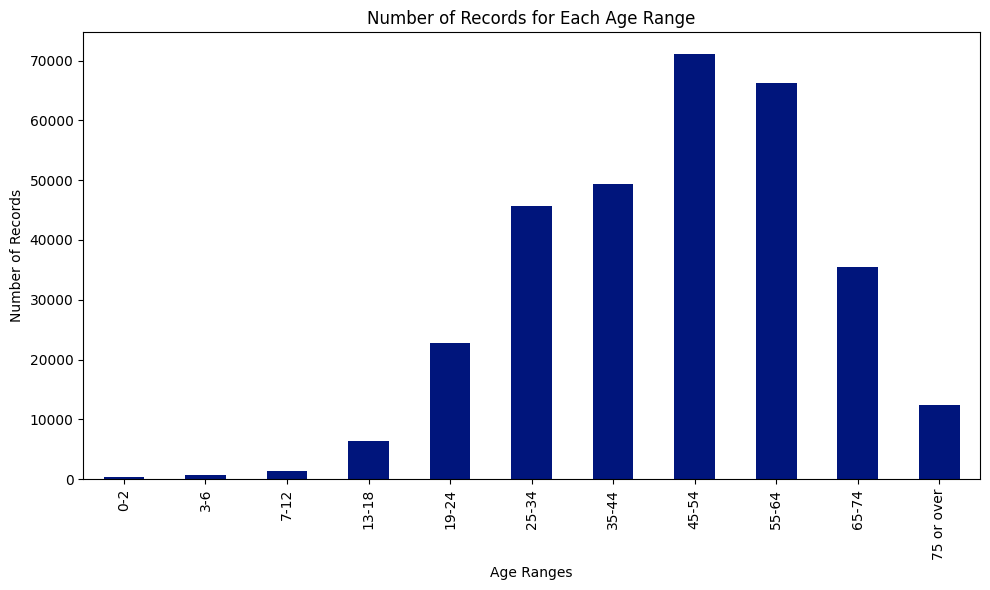

In [ ]:
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

age_counts = df['Age'].value_counts().reindex(age_order)
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='#00157c')
plt.title('Number of Records for Each Age Range')
plt.xlabel('Age Ranges')
plt.ylabel('Number of Records')
plt.tight_layout()
plt.show()

### Grafico por edad y genero

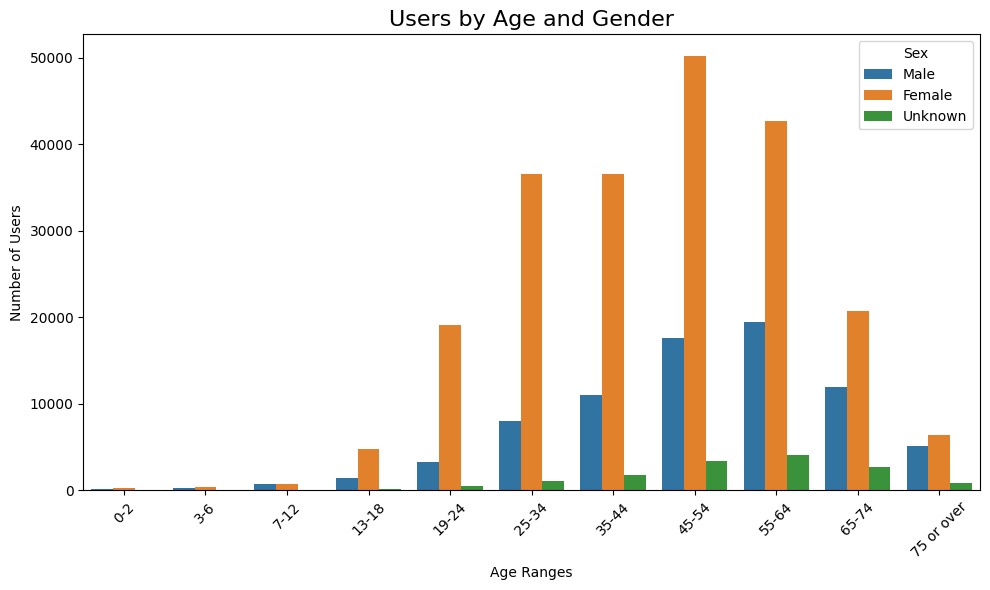

In [ ]:
age_order = ['0-2', '3-6', '7-12', '13-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75 or over']

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Sex', data=df, order=age_order)
plt.title("Users by Age and Gender", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Age Ranges')
plt.ylabel('Number of Users')
plt.legend(title='Sex', loc='upper right')
plt.tight_layout()
plt.show()

### Grafico Cantidad de Reviews por año

Text(0, 0.5, 'Count of Reviews')

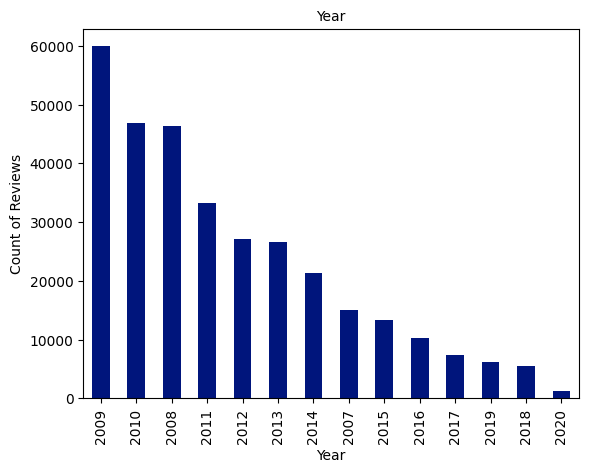

In [ ]:
df['Year'].value_counts().plot(kind='bar',color='#00157c')
plt.title("Year", fontsize = 10)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

### Top 20 Drogas

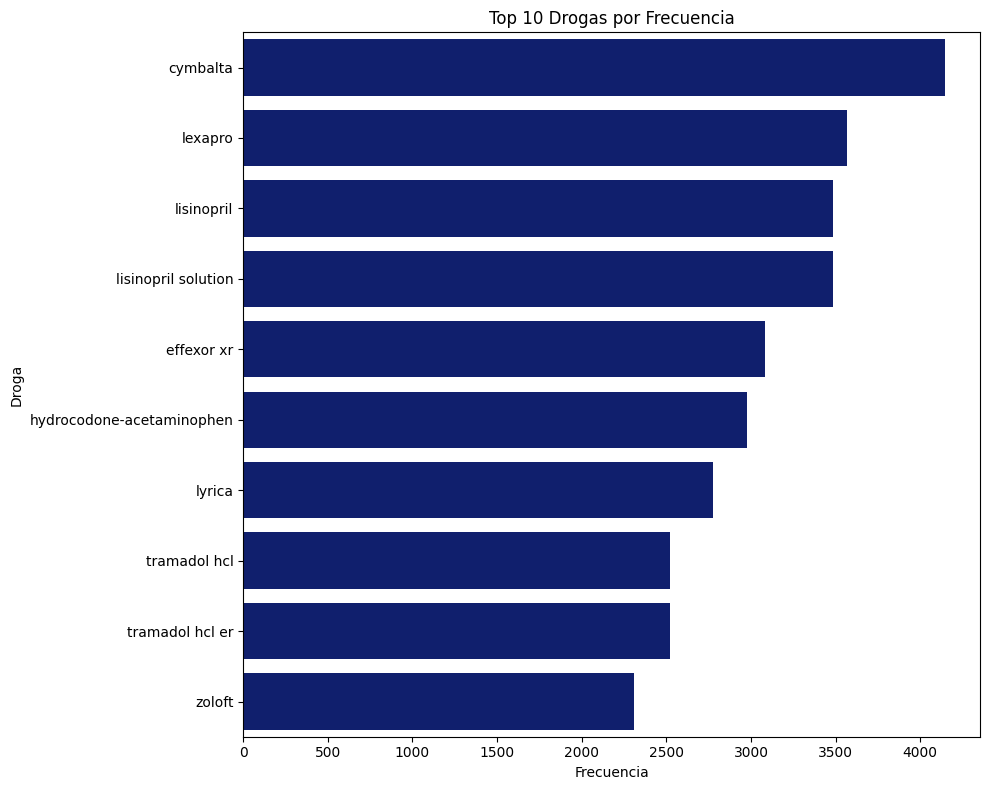

In [ ]:
top_drugs = df['Drug'].value_counts().head(10).reset_index()
top_drugs.columns = ['Drug', 'Frequency']

plt.figure(figsize=(10, 8))
sns.barplot(data=top_drugs, y='Drug', x='Frequency', color='#00157c')
plt.title("Top 10 Drogas por Frecuencia")
plt.xlabel("Frecuencia")
plt.ylabel("Droga")
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()


Top 20 Conditions

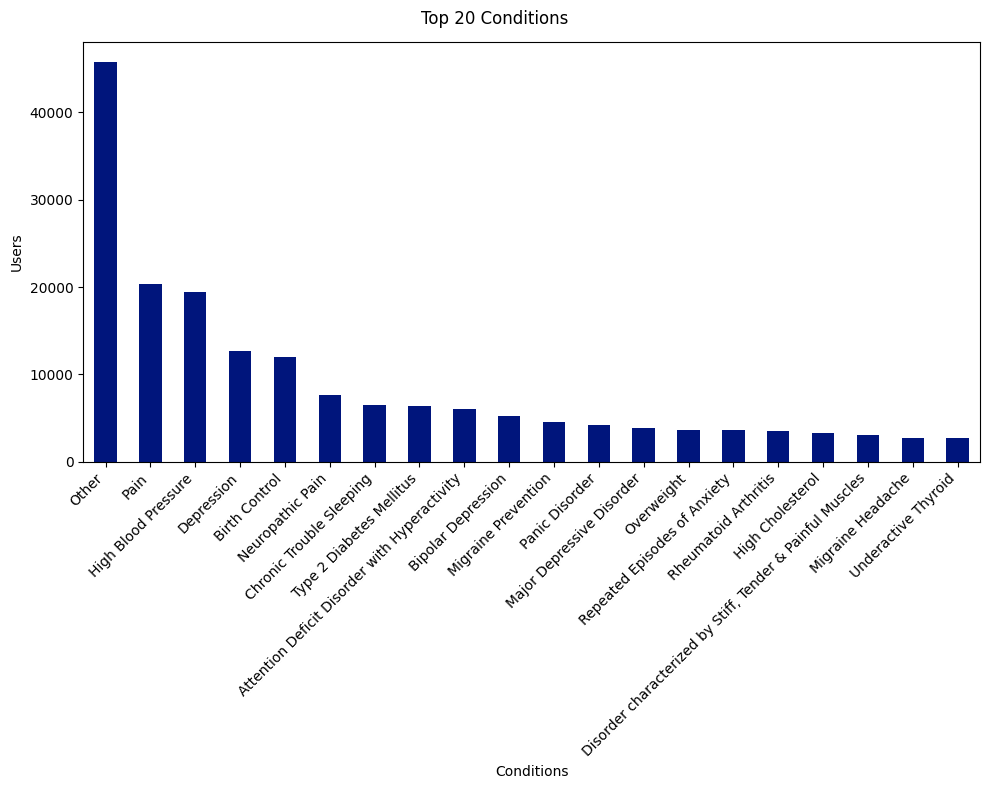

In [ ]:
df['Condition'].value_counts().nlargest(20).plot(kind='bar', color='#00157c', figsize=(10, 8))  # Use a larger width for better spacing
plt.suptitle("Top 20 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Rating de Effectiveness

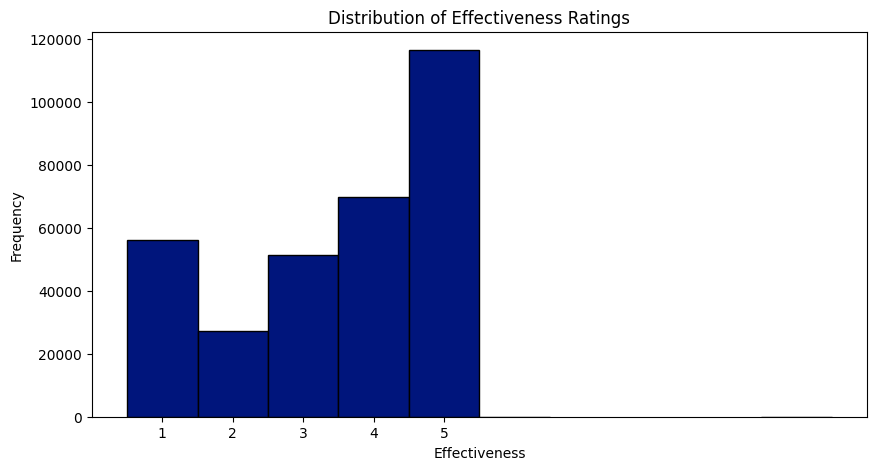

In [ ]:
effectiveness_counts = df['Effectiveness'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(10, 5))
plt.bar(effectiveness_counts.index, effectiveness_counts.values, color='#00157c', edgecolor='black', width=1.0)
plt.title('Distribution of Effectiveness Ratings')
plt.xlabel('Effectiveness')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3, 4, 5])  # Explicitly set x-ticks to ensure all categories are shown

# Show the plot
plt.show()

### Nube de Palabras

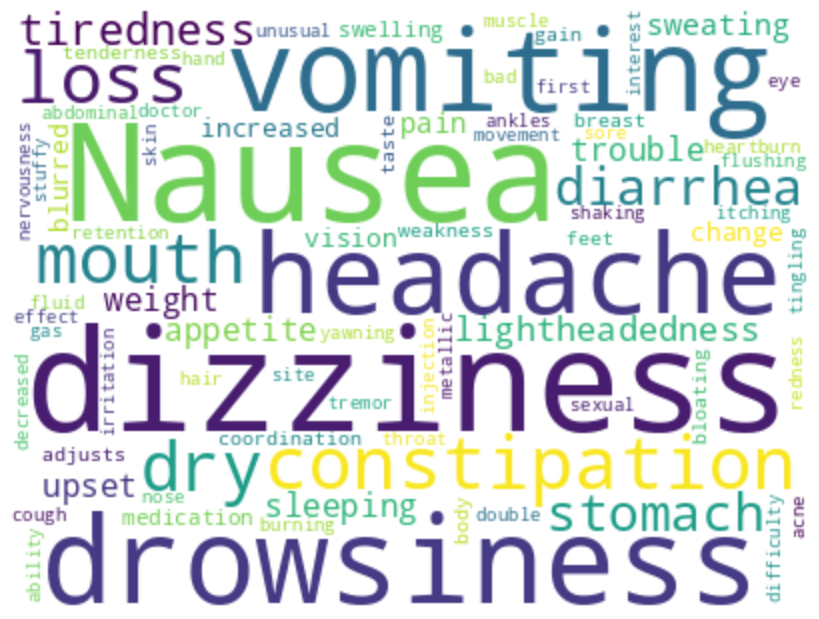

In [ ]:
all_sides_text = " ".join(str(text) for text in df['Sides'] if pd.notnull(text))
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("may")
custom_stopwords.add("occur")

wordcloud = WordCloud(width = 400, height = 300,
                      background_color='white',
                      stopwords=custom_stopwords,
                      collocations=False,
                      min_font_size=8).generate(all_sides_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

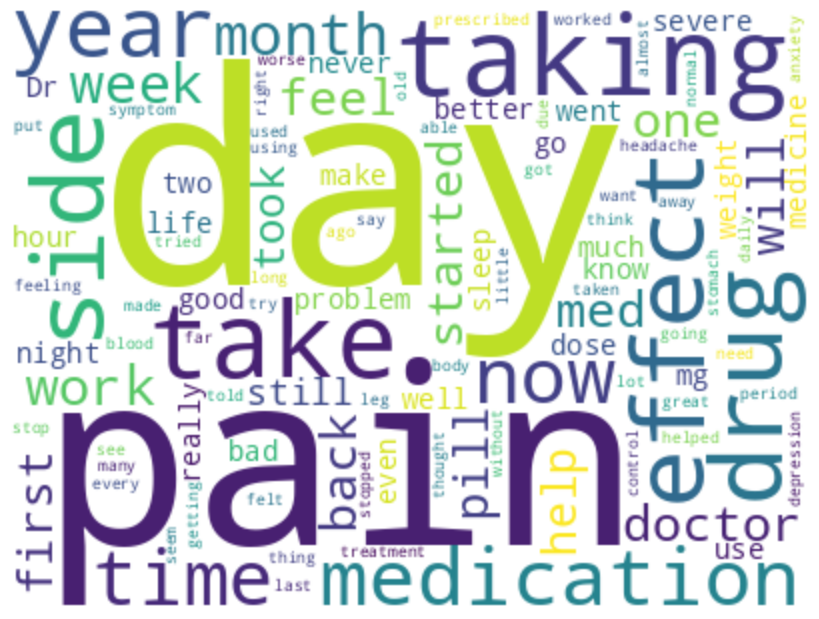

In [ ]:
all_sides_text = " ".join(text for text in df.Reviews)
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("day")
custom_stopwords.add("take")
custom_stopwords.add("taking")
wordcloud = WordCloud(width = 400, height = 300,
                      background_color='white',
                      collocations=False,
                      min_font_size=8).generate(all_sides_text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **Sides**

In [ ]:
def trimSides(columna):
    if not isinstance(columna, str):
        return columna
    columna = re.sub(r'( or |may|also|occur|"| and | the | of |\(|\)|\.|little|bit|when you apply this medication| on |side| in )', '', columna, flags=re.IGNORECASE)

    palabras = [palabra.strip().lower() for palabra in re.split(r'[,\n]', columna)]
    palabras_reemplazadas = []
    for palabra in palabras:
        if 'dry' in palabra:
            palabra = 'dryness'
        if 'stomach' in palabra or 'abdominal' in palabra or 'tummy' in palabra or 'gas' in palabra or 'diarrhea' in palabra or 'bowel' in palabra:
            palabra = 'upset stomach'
        if 'burn' in palabra or 'sting' in palabra:
            palabra = 'burning / stinging'
        if 'itch' in palabra:
            palabra = 'itching'
        if 'taste' in palabra:
            palabra = 'change in taste'
        if 'swell' in palabra:
            palabra = 'swelling'
        if 'tired' in palabra:
            palabra = 'tiredness'
        if 'nausea' in palabra or 'vomit' in palabra:
            palabra = 'nausea'
        if 'irritation' in palabra:
            palabra = 'irritation'
        if 'vision' in palabra or 'eye' in palabra:
            palabra = 'vision problems'
        if 'skin' in palabra or 'acne' in palabra:
            palabra = 'skin issues'
        if 'dizz' in palabra or 'spin' in palabra:
            palabra = 'dizziness'
        if 'pain' in palabra:
            palabra = 'body pain'
        if 'head' in palabra:
            palabra = 'headache'
        if 'sex' in palabra or 'ejaculation' in palabra:
            palabra = 'sexual issues'
        if 'sleep' in palabra:
            palabra = 'sleep issues'
        if 'urin' in palabra:
            palabra = 'urination'
        if 'red' in palabra:
            palabra = 'redness'
        if 'shak' in palabra:
            palabra = 'shaking'
        if 'peel' in palabra:
            palabra = 'peeling'
        if 'sting' in palabra:
            palabra = 'stinging'
        if 'weight' in palabra:
            palabra = 'weight changes'
        if 'ear' in palabra:
            palabra = 'hearing issues'
        if 'sweat' in palabra:
            palabra = 'sweating'
        if 'muscle' in palabra:
            palabra = 'muscle issues'
        if 'vagin' in palabra:
            palabra = 'vaginal issues'
        if 'hair' in palabra:
            palabra = 'hair issues'
        if 'appe' in palabra:
            palabra = 'appetite'
        if 'cough' in palabra:
            palabra = 'coughing'
        if 'flush' in palabra:
            palabra = 'flushing'
        if 'breast' in palabra:
            palabra = 'breast changes'
        if 'tingling' in palabra or 'numb' in palabra:
            palabra = 'tingling'
        if 'swell' in palabra:
            palabra = 'swelling'
        if 'fever' in palabra:
            palabra = 'fever'
        if 'flu' in palabra:
            palabra = 'flu symptoms'
        if 'menstrual' in palabra:
            palabra = 'menstrual issues'
        if 'constipation' in palabra:
            palabra = 'constipation'
        if 'runny' in palabra:
            palabra = 'runny nose'
        if 'vomiting' in palabra or 'nausea' in palabra:
            palabra = 'vomiting/nausea'
        if 'injection' in palabra:
            palabra = 'injection site issues'
        if 'sore throat' in palabra:
            palabra = 'sore throat'
        if 'muscle' in palabra or 'joint' in palabra:
            palabra = 'muscle/joint issue'
        if 'flaking' in palabra:
            palabra = 'flaking skin'
        if 'eye' in palabra:
            palabra = 'eye issue'
        if 'darkening' in palabra:
            palabra = 'darkening of skin'
        if 'nosebleed' in palabra or 'nose bleed' in palabra:
            palabra = 'nosebleed'
        if 'metallic' in palabra:
            palabra = 'metallic taste'
        if 'taste' in palabra:
            palabra = 'taste change'
        if 'dream' in palabra:
            palabra = 'dreams changes'
        if 'hot' in palabra or 'flush' in palabra:
            palabra = 'hot flashes'
        if 'hoarseness' in palabra or 'hoarsenesschangesvoice' in palabra:
            palabra = 'hoarseness'
        if 'heartburn' in palabra:
            palabra = 'heartburn'
        if 'voice' in palabra:
            palabra = 'change in voice'
        if 'cramp' in palabra:
            palabra = 'cramps'
        if 'saliva' in palabra:
            palabra = 'increased saliva'
        if 'irrita' in palabra:
            palabra = 'irritation'
        if 'stool' in palabra:
            palabra = 'loose/soft stool'
        if 'mood' in palabra:
            palabra = 'mood changes'
        if 'nail' in palabra:
            palabra = 'nail changes'
        if 'sneezing' in palabra:
            palabra = 'sneezing'
        if 'walking' in palabra:
            palabra = 'problems walking'
        if 'voice' in palabra:
            palabra = 'voice changes'
        if 'doctor' in palabra or 'no' in palabra or 'usually' in palabra or len(palabra) <= 2:
            continue
        palabras_reemplazadas.append(palabra)

    return ', '.join(palabras_reemplazadas)
df['Sides2'] = df['Sides'].apply(trimSides)
print(df['Sides2'].head())


In [ ]:
side_effects = df['Sides2'].str.get_dummies(sep=',')
df_encoded = df.join(side_effects)

In [ ]:
unique_sides = []

for side in df['Sides2']:
    if isinstance(side, list):
        for palabra in side:
            if palabra not in unique_sides and palabra != '':
                unique_sides.append(palabra)

print(f'Tengo {len(unique_sides)} sides, que son: {unique_sides}')

In [ ]:
columns_to_drop = [
    "effects be caused byother medicationstheir combination",
    "effects be due to any one medicinethe combinationmedications",
    "especially atstarttreatment",
    "especially when taken at high doses",
    "especiallythe first few days as your body adjusts tomedication",
    "it be difficult to tell whether darunavir is causing certain effects",
    "rarely",
    "remember that heshe has judged thatbenefit to you is greater thanrisk effects",
    "since darunavir is always taken with other hiv medications",
    "this medication cause mild",
    "because nilutamide be used with other medications",
    "because this medication is given atsiteyour condition",
    "but then sub as your body adjusts to this medication if anythese effects persistworsen"
]
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

df_encoded.head()

#Lematización

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
def lemmatize_review(review):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(review)
    lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_words)


In [ ]:
df['Lemmatized_Reviews'] = df['Reviews'].apply(lemmatize_review)
print(df[['Reviews', 'Lemmatized_Reviews']])

#Analisis de sentimiento

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'^b\s+', '', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

df['num_tokens'] = df['Lemmatized_Reviews'].apply(lambda x: len(tokenizer.tokenize(str(x))))

df['processed_reviews'] = df.apply(lambda row: preprocess_text(str(row['Lemmatized_Reviews'])) if row['num_tokens'] > 500 else str(row['Lemmatized_Reviews']), axis=1)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
df['sentiment'] = df['processed_reviews'].apply(lambda x: nlp(x)[0]['label'])
sentiment_mapping = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5
}
df['sentiment_score'] = df['sentiment'].map(sentiment_mapping)

print(df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_reviews'].values.astype('U'))
y = df['sentiment_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R²): {r2}")
print(f"Porcentaje de Predicciones Correctas (Exactitud): {accuracy * 100:.2f}%")
print("Reporte de Clasificación:")
print(report)


Error Absoluto Medio (MAE): 0.6043572984749456
Coeficiente de Determinación (R²): 0.2641797910045841
Porcentaje de Predicciones Correctas (Exactitud): 66.95%
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.63      0.88      0.73      1484
           2       0.63      0.63      0.63      1223
           3       0.80      0.50      0.61       653
           4       0.78      0.48      0.60       571
           5       0.76      0.60      0.67       659

    accuracy                           0.67      4590
   macro avg       0.72      0.62      0.65      4590
weighted avg       0.69      0.67      0.66      4590



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred_rf = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)

print(f"Mejores hiperparámetros: {best_params}")
print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R²): {r2}")
print(f"Porcentaje de Predicciones Correctas (Exactitud): {accuracy * 100:.2f}%")
print("Reporte de Clasificación:")
print(report)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Error Absoluto Medio (MAE): 0.5962962962962963
Coeficiente de Determinación (R²): 0.2677622735801003
Porcentaje de Predicciones Correctas (Exactitud): 67.76%
Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.63      0.90      0.74      1484
           2       0.65      0.63      0.64      1223
           3       0.80      0.49      0.61       653
           4       0.80      0.49      0.61       571
           5       0.77      0.61      0.68       659

    accuracy                           0.68      4590
   macro avg       0.73      0.63      0.66      4590
weighted avg       0.70      0.68      0.67      4590



In [ ]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})
predictions_df.to_csv('predictions.csv', index=False)
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.to_csv('grid_search_results.csv', index=False)

In [ ]:
df_with_predictions = df.copy()
df_with_predictions['Predicted'] = best_rf_model.predict(X)
df_with_predictions.to_csv('original_with_predictions.csv', index=False)

##Limpieza previa

In [ ]:
df = df.drop(columns=['Reviews', 'Sides','sentiment'], errors='ignore')

In [ ]:
columns_to_move = ['processed_reviews', 'sentiment_score']
target_position = 13
cols = df.columns.tolist()
for col in columns_to_move:
    cols.remove(col)
for i, col in enumerate(columns_to_move):
    cols.insert(target_position + i, col)
df = df[cols]
df.info(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 252 columns):
 #    Column                                                                                     Dtype  
---   ------                                                                                     -----  
 0    Age                                                                                        object 
 1    Condition                                                                                  object 
 2    Date                                                                                       object 
 3    Drug                                                                                       object 
 4    DrugId                                                                                     float64
 5    EaseofUse                                                                                  float64
 6    Effectiveness                               

In [ ]:
df['sentiment_score'] = df['sentiment_score'].astype('float64')
df['Effectiveness'] = df['Effectiveness'].astype('float64')
df['Satisfaction'] = df['Satisfaction'].astype('float64')
print("Tipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos después de la conversión:
Age                 object
Condition           object
Date                object
Drug                object
DrugId             float64
                    ...   
vomiting/nausea    float64
warmth             float64
weakness           float64
weight changes     float64
num_tokens           int64
Length: 252, dtype: object


##Recomendación

In [ ]:
def filtrar_datos(df, condition, age_range, sex):
    df_filtrado = df[(df['Condition'] == condition) &
                     (df['Age'] == age_range) &
                     (df['Sex'] == sex)]
    return df_filtrado

def agregar_datos(df_filtrado):
    agregados = df_filtrado.groupby('Drug').agg({
        'sentiment_score': 'mean',
        'Effectiveness': 'mean',
        'Satisfaction': 'mean'
    }).reset_index()

    side_effects = df_filtrado.iloc[:, 15:].sum().sort_values(ascending=False).head(20)

    return agregados, side_effects

def recomendar_medicamentos(df, condition, age_range, sex):
    df_filtrado = filtrar_datos(df, condition, age_range, sex)
    if df_filtrado.empty:
        return pd.DataFrame(), pd.DataFrame()
    agregados, efectos_secundarios = agregar_datos(df_filtrado)
    recomendados = agregados.sort_values(by=['sentiment_score', 'Effectiveness', 'Satisfaction'], ascending=False)
    result_list = []
    efectos_secundarios_indices = efectos_secundarios.index.tolist()
    for _, row in recomendados.iterrows():
        drug_name = row['Drug']
        drug_side_effects = df_filtrado[df_filtrado['Drug'] == drug_name].iloc[:, 15:].sum()
        drug_side_effects = drug_side_effects.reindex(efectos_secundarios_indices, fill_value=0)
        drug_row = pd.Series([drug_name] + drug_side_effects.tolist(), index=['Drug'] + efectos_secundarios_indices)
        result_list.append(drug_row)

    result_df = pd.DataFrame(result_list)

    return recomendados, result_df

In [ ]:
condition = 'Abnormally Long or Heavy Periods'
age_range = '25-34'
sex = 'Female'

In [ ]:
recomendados, tabla_efectos_secundarios = recomendar_medicamentos(df, condition, age_range, sex)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nRecomendaciones de Medicamentos:")
print(recomendados.to_string(index=False))

print("\nTabla de Recomendaciones con Efectos Secundarios:")
print(tabla_efectos_secundarios.to_string(index=False))


Recomendaciones de Medicamentos:
              Drug  sentiment_score  Effectiveness  Satisfaction
loestrin fe tablet         5.000000       5.000000      5.000000
   loestrin tablet         4.000000       5.000000      4.000000
     lomedia 24 fe         4.000000       4.500000      4.000000
           lysteda         3.095238       3.714286      3.523810
    lo loestrin fe         2.526316       3.368421      2.578947
       loestrin fe         2.500000       2.750000      3.000000
      low-ogestrel         2.000000       3.285714      2.714286
            lutera         2.000000       3.000000      2.000000
      loseasonique         1.500000       1.000000      1.000000
          loestrin         1.000000       5.000000      5.000000

Tabla de Recomendaciones con Efectos Secundarios:
              Drug  num_tokens   vomiting/nausea  vomiting/nausea   upset stomach   weight changes   swelling   breast changes   headache   body pain   bloating   unwanted/uncontrolled movements   war

#**Word2Vec**

In [ ]:
df = df.dropna(subset=['Satisfaction', 'Lemmatized_Reviews'])

sentences = [review.split() for review in df['Lemmatized_Reviews'].astype(str)]
model = Word2Vec(sentences=sentences, vector_size=200, window=5, min_count=1, workers=4)

def vectorize_review(review, model):
    words = preprocess_text(review)
    vectors = [model.wv[word] for word in words if word in model.wv]

    if vectors:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size

df['review_vector'] = df['Lemmatized_Reviews'].apply(lambda review: vectorize_review(review, model))

X = np.vstack(df['review_vector'])
y = df['Satisfaction'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_lr = regressor.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error para Regresión Lineal: {mse_lr}")
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rf.fit(X_train, y_train)
y_pred_rf = regressor_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error para RandomForest: {mse_rf}")

y_pred_lr_rounded = np.round(y_pred_lr).clip(1, 5)
y_pred_rf_rounded = np.round(y_pred_rf).clip(1, 5)
accuracy_lr = np.mean(y_pred_lr_rounded == y_test)
print(f"Precisión para Regresión Lineal: {accuracy_lr}")
accuracy_rf = np.mean(y_pred_rf_rounded == y_test)
print(f"Precisión para RandomForest: {accuracy_rf}")

In [ ]:
def adjust_values(pred):
    return np.clip(pred, 1, 5)
y_pred_lr_adjusted = adjust_values(y_pred_lr)
y_pred_rf_adjusted = adjust_values(y_pred_rf)
diff_lr = y_pred_lr_adjusted - y_test
diff_rf = y_pred_rf_adjusted - y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr_adjusted, s=np.abs(diff_lr)*10, color='blue', alpha=0.5, label='Predicciones (RL)')
plt.scatter(y_test, y_pred_rf_adjusted, s=np.abs(diff_rf)*10, color='red', alpha=0.5, label='Predicciones (RF)')
plt.plot([1, 5], [1, 5], linestyle='--', color='gray')
plt.title('Valores Predichos vs Satisfacción')
plt.xlabel('Satisfacción Real')
plt.ylabel('Valores Predichos')
plt.legend()
plt.show()